In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
params = {
    "axes.labelsize": 16,
    "font.size": 16,
    "legend.fontsize": 14,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "font.family": "sans-serif",
    "axes.grid": False,
}
plt.rcParams.update(params)

In [5]:
df = pd.read_csv("data/housing_data.txt", names=["sqft", "num_bed", "price"])
area = df.iloc[:, 0].values.reshape(-1, 1)
beds = df.iloc[:, 1].values.reshape(-1, 1)
price = df.iloc[:, 2].values.reshape(-1, 1)

In [7]:
df.shape

(47, 3)

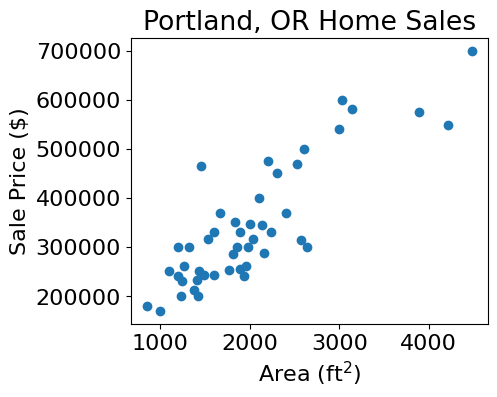

In [8]:
fig, ax = plt.subplots()
ax.plot(area, price, 'o')
ax.set_xlabel(r"Area (ft$^2$)")
ax.set_ylabel(r"Sale Price ($)")
ax.set_title("Portland, OR Home Sales")
fig.set_size_inches(5, 4)
fig.tight_layout(pad=0.5)

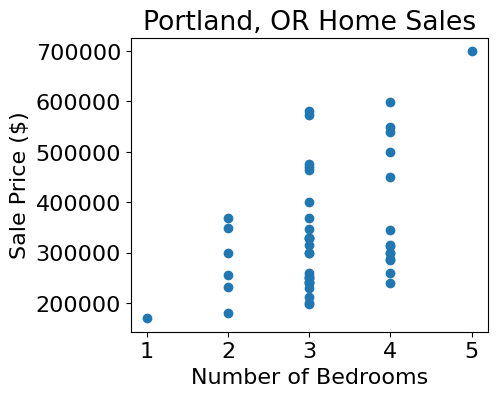

In [9]:
fig, ax = plt.subplots()
ax.plot(beds, price, 'o')
ax.set_xlabel(r"Number of Bedrooms")
ax.set_ylabel(r"Sale Price ($)")
ax.set_title("Portland, OR Home Sales")
fig.set_size_inches(5, 4)
fig.tight_layout(pad=0.5)
plt.show()

Solving the least squares problem using matrix math:

In [12]:
A = np.hstack((np.ones_like(area), area, beds))
b = price
x = np.matmul(np.linalg.inv(np.matmul(A.T, A)), np.matmul(A.T, b))

In [11]:
A

array([[   1, 2104,    3],
       [   1, 1600,    3],
       [   1, 2400,    3],
       [   1, 1416,    2],
       [   1, 3000,    4],
       [   1, 1985,    4],
       [   1, 1534,    3],
       [   1, 1427,    3],
       [   1, 1380,    3],
       [   1, 1494,    3],
       [   1, 1940,    4],
       [   1, 2000,    3],
       [   1, 1890,    3],
       [   1, 4478,    5],
       [   1, 1268,    3],
       [   1, 2300,    4],
       [   1, 1320,    2],
       [   1, 1236,    3],
       [   1, 2609,    4],
       [   1, 3031,    4],
       [   1, 1767,    3],
       [   1, 1888,    2],
       [   1, 1604,    3],
       [   1, 1962,    4],
       [   1, 3890,    3],
       [   1, 1100,    3],
       [   1, 1458,    3],
       [   1, 2526,    3],
       [   1, 2200,    3],
       [   1, 2637,    3],
       [   1, 1839,    2],
       [   1, 1000,    1],
       [   1, 2040,    4],
       [   1, 3137,    3],
       [   1, 1811,    4],
       [   1, 1437,    3],
       [   1, 1239,    3],
 

In [14]:
b.shape

(47, 1)

In [13]:
x

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

And with a much more standard approach:

In [15]:
X = np.hstack((area, beds))
y = price
model = LinearRegression().fit(X, y)

In [16]:
model.coef_

array([[  139.21067402, -8738.01911233]])

In [17]:
model.intercept_

array([89597.9095428])

Plotting results

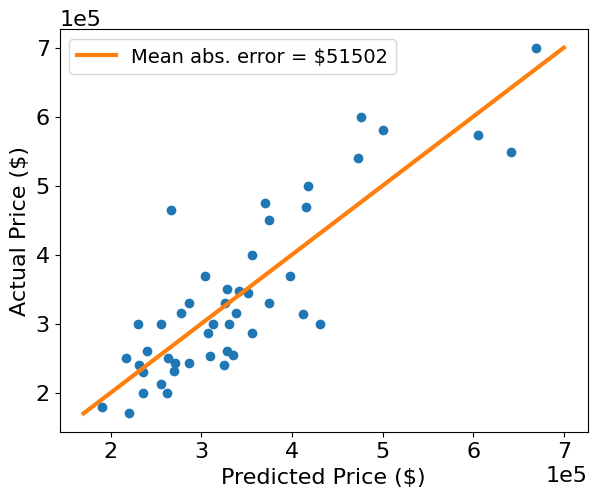

In [18]:
ypred = model.predict(X)
one = np.linspace(np.nanmin(y), np.nanmax(y), 100)
mae = np.nanmean(np.abs(ypred - y))

fig, ax = plt.subplots()
ax.plot(ypred, y, 'o')
ax.plot(one, one, '-', linewidth=3, label=f"Mean abs. error = \${int(mae)}")
ax.set_xlabel(r"Predicted Price ($)")
ax.set_ylabel(r"Actual Price ($)")
ax.legend()
fig.set_size_inches(6, 5)
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
fig.tight_layout(pad=0.5)
plt.show()
